### Developing a CNN model that will identify the species of a flower from a photograph

- Image Recognition to Identify Species of Flowers
- This is a priject to  develop a Convolutional Neural Network (CNN) model to identify species of flowers from photographs. You will train this model using the tf_flowers dataset from Tensor Flow:

https://www.tensorflow.org/datasets/catalog/tf_flowers

- This dataset contains 3670 colour photographs of flowers, consisting of five different species:
- • Daisy.
- • Dandelion.
- • Roses.
- • Sunflowers.
- • Tulips.

- Download it directly from the following url:
http://download.tensorflow.org/example_images/flower_photos.tgz

- Goal
- The goal for this project is to develop a CNN model that will identify the species of a flower from a photograph

#### Importing all neccessary libraries

In [2]:
 # Import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
 # Import tensor libaries

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras

In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from tensorflow.keras.utils import image_dataset_from_directory
image_dataset_from_directory
import tensorflow as tf
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

#### Download the Datasets: Data Pre-Processing and Data Augmentation

In [6]:
# Download and extract the flowers dataset
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, untar=True)

# Specifying the dimensions of input images
img_height, img_width = 180, 180

# implementing a validation split with 80% of images for training and 20% for validation

# Training dataset
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=32,)

# Validation dataset
val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    batch_size=32,)

228813984/228813984 [==============================] - 6s 0us/step
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
import pathlib # to allow working with the Directory of the flower image

# Convert the string path to a Path object
data_dir = pathlib.Path(data_dir)

# Use the glob method to count the number of images
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


- Therefore there are 3670 number of images

In [12]:
# checking for the class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


#### Visualization

- Below the first six images of the Flowers

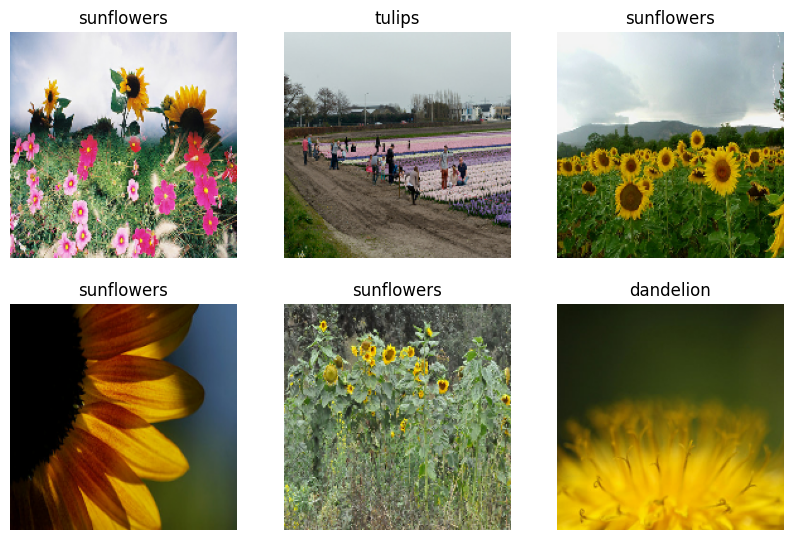

In [14]:
import matplotlib.pyplot as plt # for visualizations

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6): # first nine images from the training dataset.
    ax = plt.subplot(3, 3, i + 1)
    
    # Converting the pixel values of the image to 8-bit  
    plt.imshow(images[i].numpy().astype("uint8")) 
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
# Assuming the validation dataset is stored in val_ds
for batch in val_ds.take(1):
    inputs, _ = batch
    print("Input shape:", inputs.shape)


Input shape: (32, 180, 180, 3)


In [16]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
  print(label.shape)

Image shape:  (32, 180, 180, 3)
Label:  [3 1 1 4 3 3 1 2 1 0 3 3 4 1 1 3 1 2 3 0 0 4 0 4 1 0 4 4 2 4 4 2]
(32,)


In [17]:
x_train = []
y_train = []
for x, y in train_ds:
    x_train.append(np.uint8(x.numpy()))
    y_train.append(y.numpy())

In [18]:
print(y_train[:5])

[array([3, 3, 4, 3, 4, 0, 3, 3, 0, 4, 1, 3, 0, 2, 4, 2, 4, 4, 1, 1, 1, 3,
       2, 1, 2, 2, 1, 2, 2, 0, 0, 4]), array([1, 3, 2, 0, 4, 4, 1, 4, 1, 3, 4, 4, 4, 2, 3, 1, 3, 4, 2, 2, 1, 1,
       1, 2, 4, 0, 1, 0, 2, 0, 3, 1]), array([0, 4, 4, 3, 4, 0, 0, 0, 0, 1, 1, 4, 2, 2, 4, 2, 3, 4, 0, 1, 0, 1,
       4, 1, 4, 1, 4, 3, 4, 3, 1, 4]), array([1, 4, 1, 2, 0, 3, 2, 3, 3, 2, 0, 2, 0, 4, 2, 4, 4, 3, 4, 1, 1, 4,
       4, 2, 4, 4, 2, 0, 4, 1, 1, 4]), array([0, 4, 1, 1, 0, 4, 3, 3, 2, 0, 0, 4, 3, 0, 4, 1, 0, 3, 2, 1, 3, 0,
       1, 0, 3, 4, 3, 4, 0, 1, 4, 1])]


In [19]:
print(x_train[:5])

[array([[[[128, 103,  16],
         [133, 109,  23],
         [138, 113,  28],
         ...,
         [142, 103,  38],
         [147, 110,  43],
         [150, 113,  42]],

        [[134, 108,  22],
         [136, 111,  26],
         [139, 113,  28],
         ...,
         [138, 100,  34],
         [142, 105,  37],
         [143, 106,  35]],

        [[139, 112,  25],
         [137, 110,  26],
         [138, 110,  26],
         ...,
         [138, 101,  33],
         [141, 104,  36],
         [140, 105,  34]],

        ...,

        [[ 63,  61,   2],
         [ 65,  55,   0],
         [ 72,  58,   3],
         ...,
         [ 47,  46,   0],
         [ 61,  54,   0],
         [ 70,  58,   0]],

        [[ 74,  72,   3],
         [ 59,  49,   0],
         [ 61,  48,   2],
         ...,
         [ 42,  43,   1],
         [ 52,  47,   0],
         [ 61,  51,   0]],

        [[ 82,  80,   2],
         [ 58,  46,   0],
         [ 55,  44,   0],
         ...,
         [ 40,  42,   2],
       

In [20]:
# Enhancing the efficiency of data handling during model training in TensorFlow
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) # for the training dataset
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)# for the validation dataset

#### 2A-Create, train, compile,validating, visualize and classify the model

- This architecture is a foundational point for image classification tasks upon which subsequent modificataion (regularization and hypertuning) would be implemented to enhance optimization of model performance

In [62]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])

In [30]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)





# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

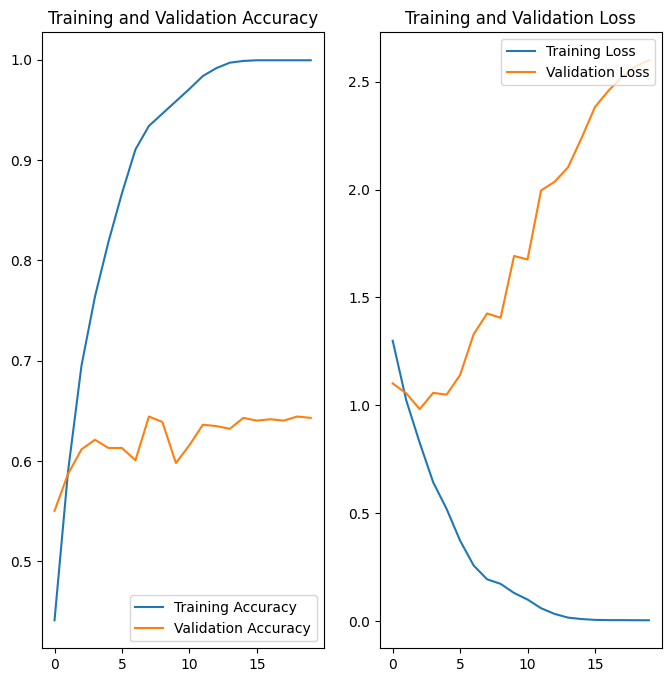

23/23 [==============================] - 2s 83ms/step - loss: 2.6001 - accuracy: 0.6431
Validation Loss: 2.6000912189483643, Validation Accuracy: 0.6430517435073853


In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

1/1 [==============================] - 0s 133ms/step


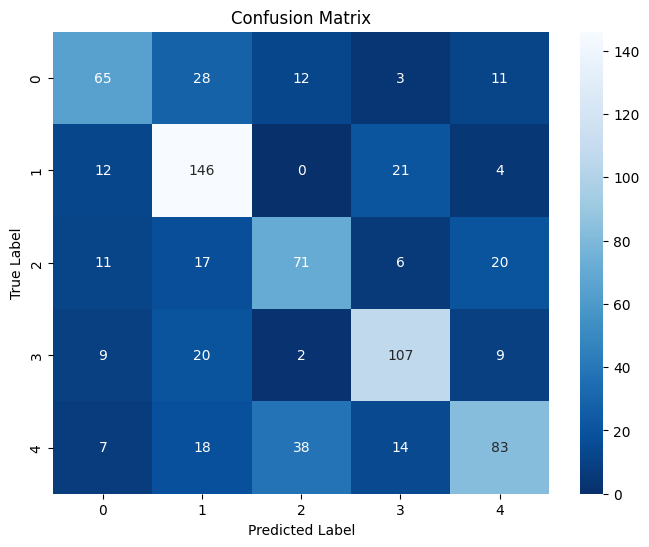


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.62      0.55      0.58       119
     Class 1       0.64      0.80      0.71       183
     Class 2       0.58      0.57      0.57       125
     Class 3       0.71      0.73      0.72       147
     Class 4       0.65      0.52      0.58       160

    accuracy                           0.64       734
   macro avg       0.64      0.63      0.63       734
weighted avg       0.64      0.64      0.64       734



In [33]:
# Function to predict labels for a dataset
def predict_labels(model, dataset):
    predictions = []
    true_labels = []

    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())

    return np.array(predictions), np.array(true_labels)

# Predict labels for the validation dataset
val_predictions, val_true_labels = predict_labels(model, val_ds)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues_r', xticklabels=range(num_classes), yticklabels=range(num_classes))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print('\nClassification Report:')
print(classification_report(val_true_labels, val_predictions, target_names=class_names))


#### 2B. Regularization of the model

- L2 Regularization: Added kernel_regularizer with L2 regularization strength of 0.01 to each convolutional layer and the dense layer.
- Batch Normalization: Added BatchNormalization() after each convolutional layer.
- Dropout: Added Dropout(0.5) after the dense layer to introduce dropout
- This is to enhance the model's training stability by preventing overfitting

Epoch 1/20
92/92 [==============================] - 66s 710ms/step - loss: 1.2800 - accuracy: 0.4486 - val_loss: 1.1482 - val_accuracy: 0.5354
Epoch 2/20
92/92 [==============================] - 67s 727ms/step - loss: 1.0478 - accuracy: 0.5797 - val_loss: 1.0806 - val_accuracy: 0.5518
Epoch 3/20
92/92 [==============================] - 75s 815ms/step - loss: 0.9088 - accuracy: 0.6550 - val_loss: 0.9991 - val_accuracy: 0.6076
Epoch 4/20
92/92 [==============================] - 69s 747ms/step - loss: 0.7599 - accuracy: 0.7146 - val_loss: 0.9839 - val_accuracy: 0.6308
Epoch 5/20
92/92 [==============================] - 68s 737ms/step - loss: 0.6041 - accuracy: 0.7786 - val_loss: 1.0816 - val_accuracy: 0.6022
Epoch 6/20
92/92 [==============================] - 65s 713ms/step - loss: 0.4626 - accuracy: 0.8430 - val_loss: 1.1549 - val_accuracy: 0.6090
Epoch 7/20
92/92 [==============================] - 64s 699ms/step - loss: 0.3691 - accuracy: 0.8760 - val_loss: 1.5331 - val_accuracy: 0.5695

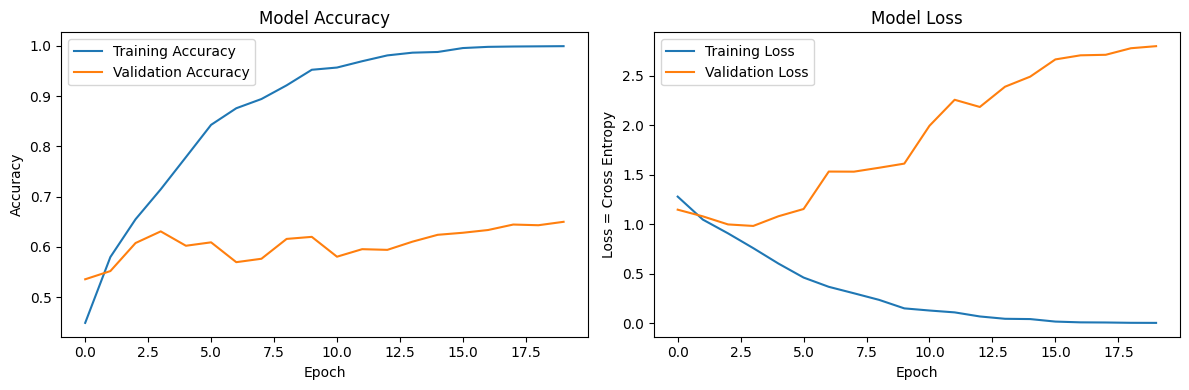

23/23 [==============================] - 3s 131ms/step - loss: 2.7995 - accuracy: 0.6499
Validation Loss: 2.7995049953460693, Validation Accuracy: 0.6498637795448303


In [34]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),  # Normalise the images by dividing by 255
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# storing the history of the trained model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

# Plotting the history of the trained model
plt.figure(figsize=(12, 4))

# Plot of training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot of training & validation loss 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss = Cross Entropy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 41, 41, 32)       

1/1 [==============================] - 0s 125ms/step


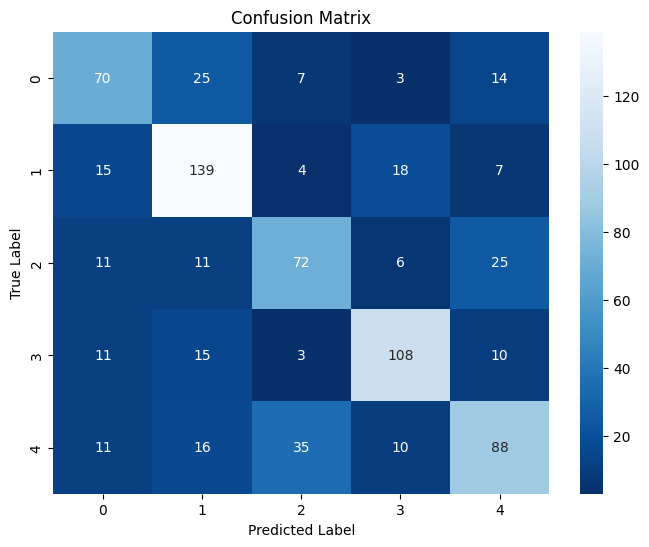


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.59      0.59      0.59       119
     Class 1       0.67      0.76      0.71       183
     Class 2       0.60      0.58      0.59       125
     Class 3       0.74      0.73      0.74       147
     Class 4       0.61      0.55      0.58       160

    accuracy                           0.65       734
   macro avg       0.64      0.64      0.64       734
weighted avg       0.65      0.65      0.65       734



In [37]:
# Function to predict labels for a dataset
def predict_labels(model, dataset):
    predictions = []
    true_labels = []

    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())

    return np.array(predictions), np.array(true_labels)

# Predict labels for the validation dataset
val_predictions, val_true_labels = predict_labels(model, val_ds)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues_r', xticklabels=range(num_classes), yticklabels=range(num_classes))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print('\nClassification Report:')
print(classification_report(val_true_labels, val_predictions, target_names=class_names))


In [ ]:
Augumentation

In [39]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ])

In [48]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30
92/92 [==============================] - 54s 575ms/step - loss: 1.3194 - accuracy: 0.4373 - val_loss: 1.0923 - val_accuracy: 0.5872
Epoch 2/30
92/92 [==============================] - 54s 588ms/step - loss: 1.0508 - accuracy: 0.5760 - val_loss: 0.9928 - val_accuracy: 0.6308
Epoch 3/30
92/92 [==============================] - 49s 532ms/step - loss: 0.9679 - accuracy: 0.6165 - val_loss: 0.9930 - val_accuracy: 0.6063
Epoch 4/30
92/92 [==============================] - 49s 535ms/step - loss: 0.8944 - accuracy: 0.6614 - val_loss: 0.9012 - val_accuracy: 0.6417
Epoch 5/30
92/92 [==============================] - 48s 526ms/step - loss: 0.8237 - accuracy: 0.6877 - val_loss: 0.8594 - val_accuracy: 0.6580
Epoch 6/30
92/92 [==============================] - 49s 529ms/step - loss: 0.7742 - accuracy: 0.6989 - val_loss: 0.8436 - val_accuracy: 0.6717
Epoch 7/30
92/92 [==============================] - 49s 528ms/step - loss: 0.7277 - accuracy: 0.7190 - val_loss: 0.8313 - val_accuracy: 0.6757

In [49]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

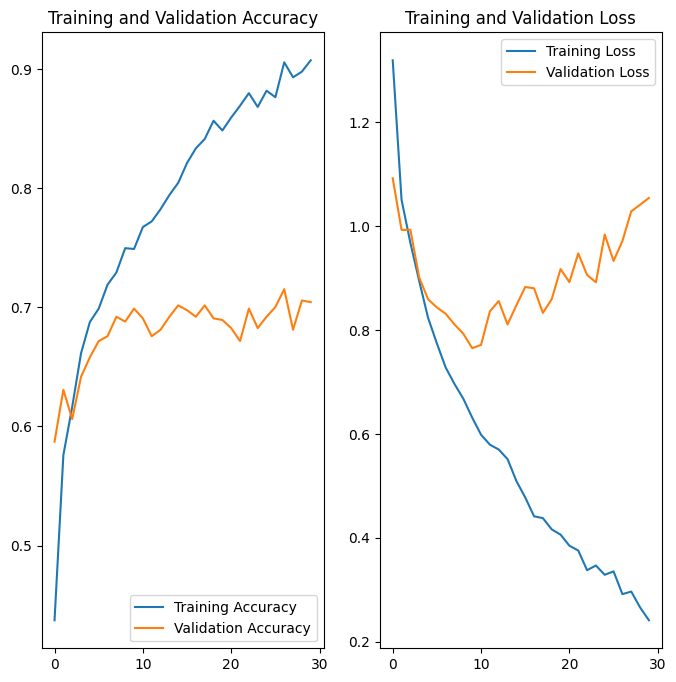

23/23 [==============================] - 2s 71ms/step - loss: 1.0543 - accuracy: 0.7044
Validation Loss: 1.054343819618225, Validation Accuracy: 0.7043596506118774


In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

1/1 [==============================] - 0s 125ms/step


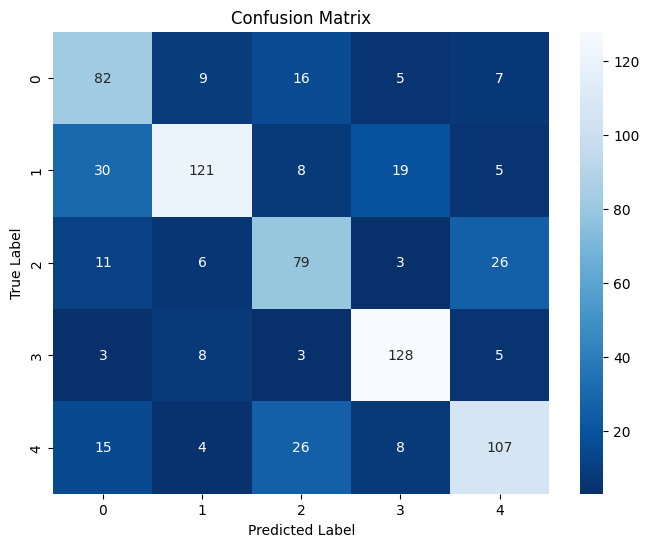


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.58      0.69      0.63       119
     Class 1       0.82      0.66      0.73       183
     Class 2       0.60      0.63      0.61       125
     Class 3       0.79      0.87      0.83       147
     Class 4       0.71      0.67      0.69       160

    accuracy                           0.70       734
   macro avg       0.70      0.70      0.70       734
weighted avg       0.71      0.70      0.71       734



In [51]:
# Function to predict labels for a dataset
def predict_labels(model, dataset):
    predictions = []
    true_labels = []

    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())

    return np.array(predictions), np.array(true_labels)

# Predict labels for the validation dataset
val_predictions, val_true_labels = predict_labels(model, val_ds)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues_r', xticklabels=range(num_classes), yticklabels=range(num_classes))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print('\nClassification Report:')
print(classification_report(val_true_labels, val_predictions, target_names=class_names))


In [53]:
### Dropout, optimizer

In [54]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30
92/92 [==============================] - 55s 581ms/step - loss: 1.3298 - accuracy: 0.4244 - val_loss: 1.1573 - val_accuracy: 0.5354
Epoch 2/30
92/92 [==============================] - 58s 633ms/step - loss: 1.0430 - accuracy: 0.5790 - val_loss: 0.9920 - val_accuracy: 0.6117
Epoch 3/30
92/92 [==============================] - 49s 528ms/step - loss: 0.9272 - accuracy: 0.6339 - val_loss: 0.9959 - val_accuracy: 0.6090
Epoch 4/30
92/92 [==============================] - 49s 534ms/step - loss: 0.8474 - accuracy: 0.6550 - val_loss: 0.9872 - val_accuracy: 0.6240
Epoch 5/30
92/92 [==============================] - 54s 588ms/step - loss: 0.8078 - accuracy: 0.6863 - val_loss: 0.8969 - val_accuracy: 0.6499
Epoch 6/30
92/92 [==============================] - 49s 534ms/step - loss: 0.7566 - accuracy: 0.7040 - val_loss: 0.9653 - val_accuracy: 0.6417
Epoch 7/30
92/92 [==============================] - 49s 531ms/step - loss: 0.7197 - accuracy: 0.7149 - val_loss: 0.8826 - val_accuracy: 0.6594

In [55]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

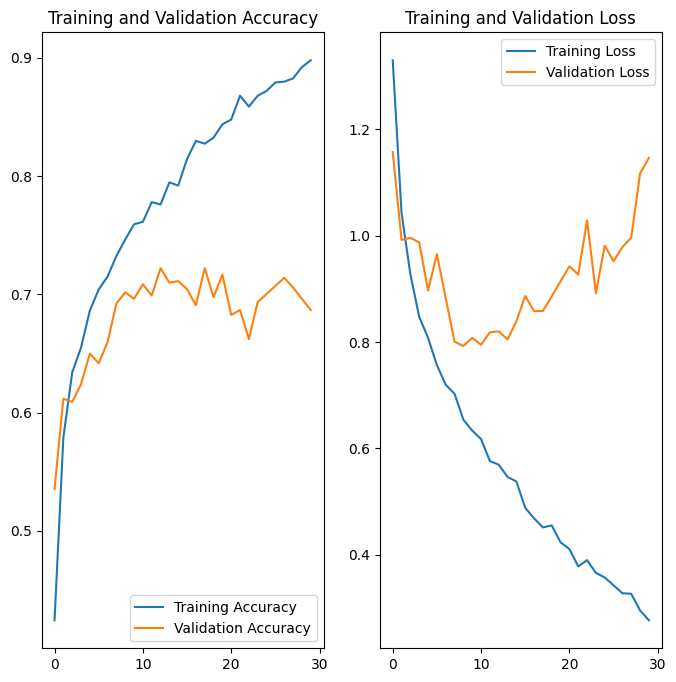

23/23 [==============================] - 2s 76ms/step - loss: 1.1462 - accuracy: 0.6866
Validation Loss: 1.1462410688400269, Validation Accuracy: 0.6866484880447388


In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

1/1 [==============================] - 0s 120ms/step


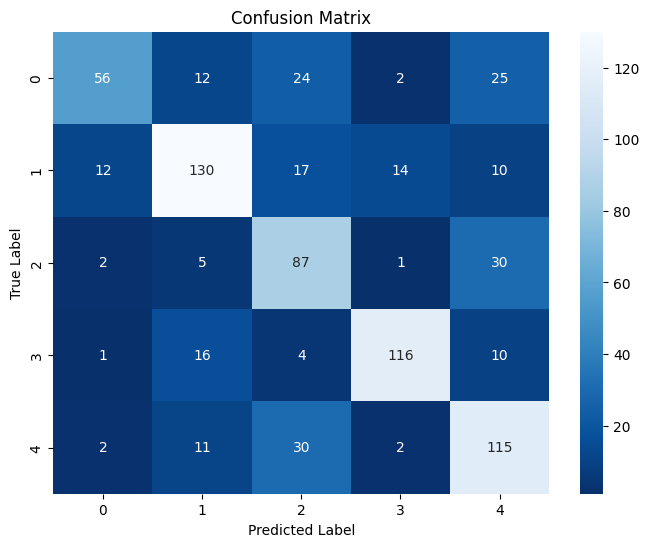


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.47      0.58       119
     Class 1       0.75      0.71      0.73       183
     Class 2       0.54      0.70      0.61       125
     Class 3       0.86      0.79      0.82       147
     Class 4       0.61      0.72      0.66       160

    accuracy                           0.69       734
   macro avg       0.70      0.68      0.68       734
weighted avg       0.71      0.69      0.69       734



In [57]:
# Function to predict labels for a dataset
def predict_labels(model, dataset):
    predictions = []
    true_labels = []

    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())

    return np.array(predictions), np.array(true_labels)

# Predict labels for the validation dataset
val_predictions, val_true_labels = predict_labels(model, val_ds)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues_r', xticklabels=range(num_classes), yticklabels=range(num_classes))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print('\nClassification Report:')
print(classification_report(val_true_labels, val_predictions, target_names=class_names))


In [58]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30
92/92 [==============================] - 104s 1s/step - loss: 1.3057 - accuracy: 0.4513 - val_loss: 1.0829 - val_accuracy: 0.5763
Epoch 2/30
92/92 [==============================] - 97s 1s/step - loss: 1.0292 - accuracy: 0.5984 - val_loss: 0.9725 - val_accuracy: 0.6349
Epoch 3/30
92/92 [==============================] - 103s 1s/step - loss: 0.9277 - accuracy: 0.6339 - val_loss: 0.9531 - val_accuracy: 0.6294
Epoch 4/30
92/92 [==============================] - 104s 1s/step - loss: 0.8431 - accuracy: 0.6652 - val_loss: 0.8878 - val_accuracy: 0.6526
Epoch 5/30
92/92 [==============================] - 95s 1s/step - loss: 0.7893 - accuracy: 0.6931 - val_loss: 0.8240 - val_accuracy: 0.6839
Epoch 6/30
92/92 [==============================] - 94s 1s/step - loss: 0.7329 - accuracy: 0.7255 - val_loss: 0.7959 - val_accuracy: 0.6866
Epoch 7/30
92/92 [==============================] - 93s 1s/step - loss: 0.6925 - accuracy: 0.7262 - val_loss: 0.8013 - val_accuracy: 0.6962
Epoch 8/30
92/92 

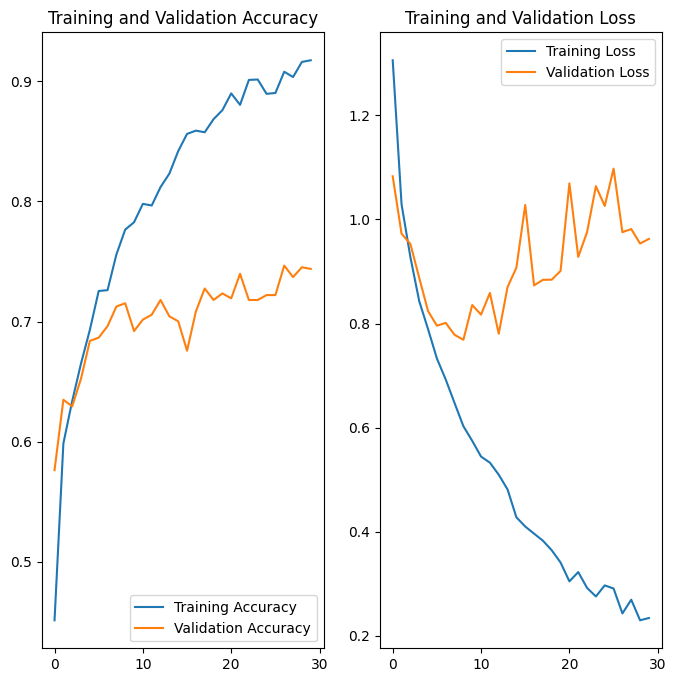

23/23 [==============================] - 4s 153ms/step - loss: 0.9626 - accuracy: 0.7439
Validation Loss: 0.9626298546791077, Validation Accuracy: 0.7438691854476929


In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

In [60]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                

1/1 [==============================] - 0s 199ms/step


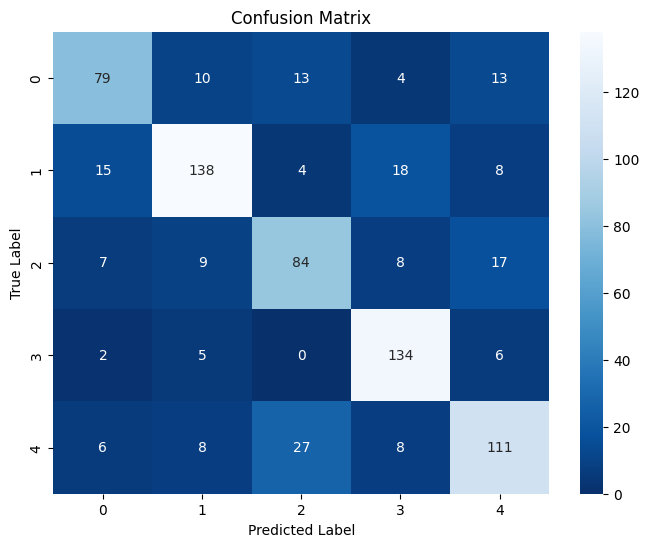


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.66      0.69       119
     Class 1       0.81      0.75      0.78       183
     Class 2       0.66      0.67      0.66       125
     Class 3       0.78      0.91      0.84       147
     Class 4       0.72      0.69      0.70       160

    accuracy                           0.74       734
   macro avg       0.74      0.74      0.74       734
weighted avg       0.74      0.74      0.74       734



In [59]:
# Function to predict labels for a dataset
def predict_labels(model, dataset):
    predictions = []
    true_labels = []

    for images, labels in dataset:
        batch_predictions = model.predict(images)
        batch_predictions = np.argmax(batch_predictions, axis=1)
        predictions.extend(batch_predictions)
        true_labels.extend(labels.numpy())

    return np.array(predictions), np.array(true_labels)

# Predict labels for the validation dataset
val_predictions, val_true_labels = predict_labels(model, val_ds)

# Generate confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues_r', xticklabels=range(num_classes), yticklabels=range(num_classes))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
class_names = [f'Class {i}' for i in range(num_classes)]
print('\nClassification Report:')
print(classification_report(val_true_labels, val_predictions, target_names=class_names))
